In [7]:
pip install kafka-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 4.9 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.5677 - loss: 0.6888 - val_accuracy: 0.6829 - val_loss: 0.6028
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7077 - loss: 0.6085 - val_accuracy: 0.7317 - val_loss: 0.5472
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6793 - loss: 0.5693 - val_accuracy: 0.7642 - val_loss: 0.5107
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7306 - loss: 0.5277 - val_accuracy: 0.7480 - val_loss: 0.4895
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7412 - loss: 0.4940 - val_accuracy: 0.7724 - val_loss: 0.4749
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7679 - loss: 0.5020 - val_accuracy: 0.7724 - val_loss: 0.4586
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7765 - loss: 0.4589 - val_accuracy: 0.7724 - val_loss: 0.4480
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7756 - loss: 0.4822 - val_accuracy: 0.772

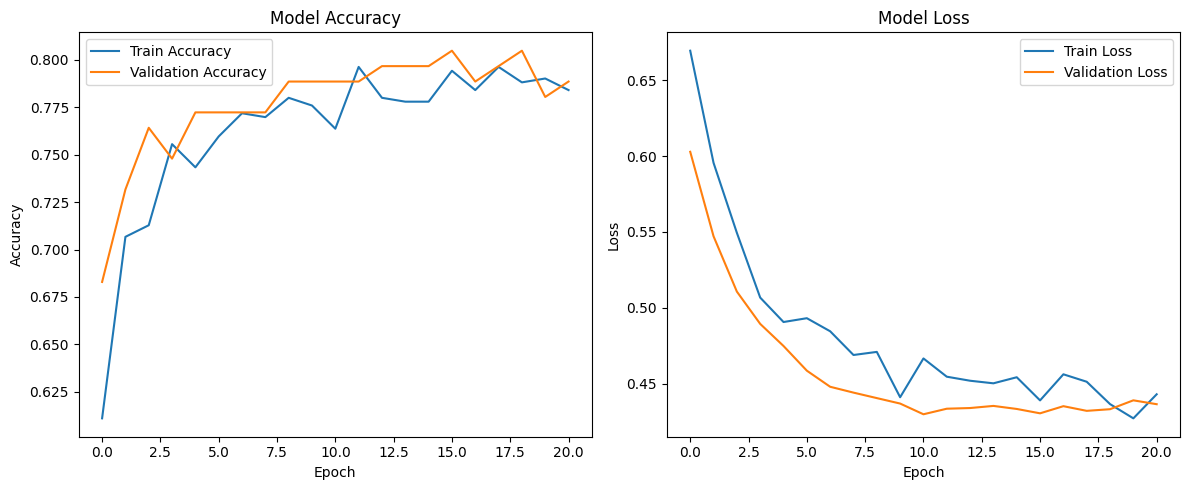

Model saved as 'diabetes_prediction_model.keras'


In [1]:
# Diabetes Prediction using Deep Learning
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigree', 'Age', 'Outcome']
df = pd.read_csv(url, names=column_names)

# Data preprocessing
# Replace zeros with NaN except for Pregnancies and Outcome
zero_fields = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_fields] = df[zero_fields].replace(0, np.nan)

# Fill missing values with mean
df.fillna(df.mean(), inplace=True)

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Model evaluation
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output

# Performance metrics
print("\n" + "="*50)
print("Model Performance Evaluation:")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model
model.save('diabetes_prediction_model.keras')
print("Model saved as 'diabetes_prediction_model.keras'")

# Save to GitHub (run this command in Colab after setting up)
# !git add diabetes_prediction_model.keras
# !git commit -m "Add trained diabetes prediction model"
# !git push